In [34]:
# 필요한 라이브러리
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
tf.__version__

'2.1.0'

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
# 준비된 수술 환자 데이터를 불러들임
Data_set = np.loadtxt("../dataset/ThoraricSurgery.csv", delimiter=",")
Data_set[:3,:]

array([[293.  ,   1.  ,   3.8 ,   2.8 ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,  12.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88,   2.16,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   1.  ,  14.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19,   2.5 ,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,  11.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,
         66.  ,   1.  ]])

In [38]:
# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:, 0:17]
Y = Data_set[:, 17]
X.shape, Y.shape

((470, 17), (470,))

In [39]:
# 80% Train set, 20% Test set으로 분리 (+ 20% validation set)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=156)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

In [40]:
# 딥러닝 모델 설정
model = Sequential([
    Dense(30, input_shape=(17,), activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 딥러닝 환경 설정 (오차함수, 최적화함수)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir() #예를 들면, './my_logs/run_2019_06_07-15_15_22'

In [44]:
# 딥러닝 실행
# model.fit(X, Y, epochs=20, batch_size=10)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.2,
                    callbacks=[tensorboard_cb])

Train on 300 samples, validate on 76 samples
Epoch 1/30
300/300 [==============================] - 0s 2ms/sample - loss: 13.7110 - accuracy: 0.1500 - val_loss: 5.1594 - val_accuracy: 0.1579
Epoch 2/30
300/300 [==============================] - 0s 247us/sample - loss: 1.6765 - accuracy: 0.6100 - val_loss: 1.3197 - val_accuracy: 0.8421
Epoch 3/30
300/300 [==============================] - 0s 281us/sample - loss: 1.5008 - accuracy: 0.8467 - val_loss: 1.7548 - val_accuracy: 0.8421
Epoch 4/30
300/300 [==============================] - 0s 275us/sample - loss: 1.5776 - accuracy: 0.8467 - val_loss: 1.4122 - val_accuracy: 0.8421
Epoch 5/30
300/300 [==============================] - 0s 281us/sample - loss: 1.1289 - accuracy: 0.8467 - val_loss: 0.9110 - val_accuracy: 0.8421
Epoch 6/30
300/300 [==============================] - 0s 217us/sample - loss: 0.6861 - accuracy: 0.8367 - val_loss: 0.5384 - val_accuracy: 0.8289
Epoch 7/30
300/300 [==============================] - 0s 163us/sample - loss: 0.

In [45]:
# 결과 출력
# evaluate() returns the loss value & metrics values for the model
print("\n Accuracy: %.4f"%(model.evaluate(X, Y, verbose=2))[1])

470/470 - 0s - loss: 0.4493 - accuracy: 0.8511

 Accuracy: 0.8511


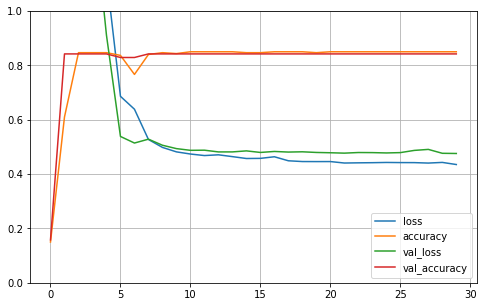

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [49]:
df = pd.DataFrame(history.history)

In [52]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,13.710967,0.150000,5.159378,0.157895
1,1.676528,0.610000,1.319716,0.842105
2,1.500841,0.846667,1.754783,0.842105
3,1.577574,0.846667,1.412163,0.842105
4,1.128859,0.846667,0.910956,0.842105
